In [1]:
! pip install datasets transformers

In [2]:
from datasets import load_dataset

ds = load_dataset('beans')
ds

Using custom data configuration default
Reusing dataset beans (/Users/aldozaimi/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [3]:
ex = ds['train'][300]
ex

{'image_file_path': '/Users/aldozaimi/.cache/huggingface/datasets/downloads/extracted/f00933b33ebb0743e8e341ae5e6f12b759ddccf0d8ef8b098a1f46ffee863a7e/train/healthy/healthy_train.121.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 2}

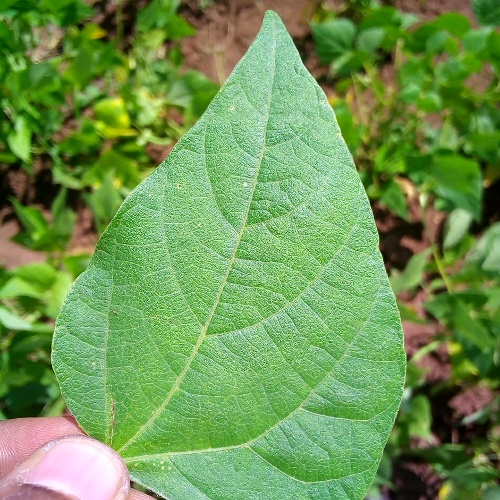

In [4]:
image = ex['image']
image

In [5]:
labels = ds['train'].features['labels']
labels

ClassLabel(num_classes=3, names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)

In [6]:
labels.int2str(ex['labels'])

'healthy'

Loading cached processed dataset at /Users/aldozaimi/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-e56132f7dc287226.arrow
Loading cached processed dataset at /Users/aldozaimi/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-e7d1763eb2fb45e7.arrow
Loading cached processed dataset at /Users/aldozaimi/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791/cache-9f61c87a366d1635.arrow


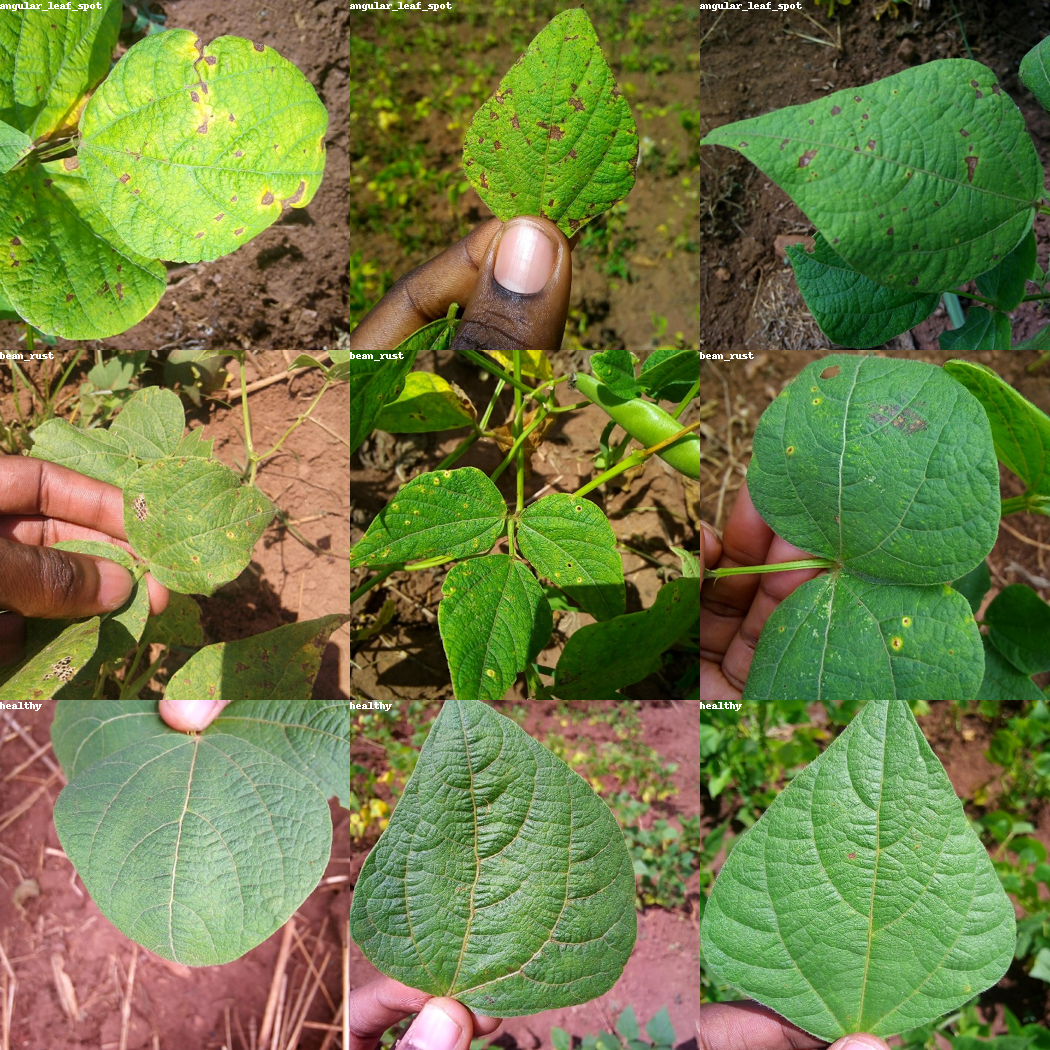

In [7]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255))

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [8]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

In [9]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [10]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.7255, -0.7255, -0.7020,  ..., -0.7490, -0.7333, -0.7098],
          [-0.7333, -0.7333, -0.7098,  ..., -0.7490, -0.7412, -0.7255],
          [-0.6941, -0.6863, -0.7020,  ..., -0.7569, -0.7804, -0.7490],
          ...,
          [ 0.4431,  0.4353,  0.4196,  ..., -0.2941, -0.2863, -0.2627],
          [ 0.3882,  0.4039,  0.4039,  ..., -0.2471, -0.2078, -0.1608],
          [ 0.3804,  0.4510,  0.3882,  ..., -0.2157, -0.1451, -0.1137]],

         [[-0.0667, -0.0745, -0.0431,  ..., -0.2941, -0.3098, -0.2941],
          [-0.0667, -0.0667, -0.0588,  ..., -0.3098, -0.3333, -0.3255],
          [-0.0510, -0.0431, -0.0745,  ..., -0.3255, -0.3569, -0.3333],
          ...,
          [ 0.0431,  0.0510,  0.0431,  ...,  0.0275,  0.0588,  0.0824],
          [-0.0118,  0.0510,  0.0667,  ...,  0.0510,  0.1137,  0.1686],
          [-0.0196,  0.1059,  0.0588,  ...,  0.0745,  0.1686,  0.2078]],

         [[-0.9843, -1.0000, -1.0000,  ..., -0.7725, -0.7804, -0.7569],
          [-1

In [11]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs


process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.4510, -0.4745, -0.4902,  ...,  0.4824,  0.4745,  0.3490],
          [-0.4039, -0.4510, -0.4745,  ...,  0.3176,  0.3333,  0.2863],
          [-0.2627, -0.2863, -0.3020,  ...,  0.1843,  0.2471,  0.2314],
          ...,
          [ 0.6706,  0.6706,  0.6706,  ...,  0.1216,  0.0980,  0.0353],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.1373,  0.1059,  0.0510],
          [ 0.6078,  0.6392,  0.6549,  ...,  0.1294,  0.1059, -0.0039]],

         [[-0.6549, -0.6941, -0.6941,  ...,  0.1765,  0.1686,  0.0353],
          [-0.4745, -0.5765, -0.6471,  ...,  0.0039,  0.0196, -0.0275],
          [-0.2000, -0.2706, -0.3412,  ..., -0.1529, -0.0902, -0.1059],
          ...,
          [ 0.1843,  0.1843,  0.1686,  ..., -0.0353, -0.0039, -0.0275],
          [ 0.1608,  0.1686,  0.1608,  ..., -0.1216, -0.1137, -0.1059],
          [ 0.0980,  0.1373,  0.1608,  ..., -0.1529, -0.1373, -0.1765]],

         [[-0.8588, -0.8667, -0.8667,  ...,  0.0588,  0.0824, -0.0510],
          [-0

In [12]:
ds = load_dataset('beans')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

Using custom data configuration default
Reusing dataset beans (/Users/aldozaimi/.cache/huggingface/datasets/beans/default/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791)


  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
prepared_ds = ds.with_transform(transform)

In [14]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.4510, -0.4745, -0.4902,  ...,  0.4824,  0.4745,  0.3490],
          [-0.4039, -0.4510, -0.4745,  ...,  0.3176,  0.3333,  0.2863],
          [-0.2627, -0.2863, -0.3020,  ...,  0.1843,  0.2471,  0.2314],
          ...,
          [ 0.6706,  0.6706,  0.6706,  ...,  0.1216,  0.0980,  0.0353],
          [ 0.6627,  0.6627,  0.6627,  ...,  0.1373,  0.1059,  0.0510],
          [ 0.6078,  0.6392,  0.6549,  ...,  0.1294,  0.1059, -0.0039]],

         [[-0.6549, -0.6941, -0.6941,  ...,  0.1765,  0.1686,  0.0353],
          [-0.4745, -0.5765, -0.6471,  ...,  0.0039,  0.0196, -0.0275],
          [-0.2000, -0.2706, -0.3412,  ..., -0.1529, -0.0902, -0.1059],
          ...,
          [ 0.1843,  0.1843,  0.1686,  ..., -0.0353, -0.0039, -0.0275],
          [ 0.1608,  0.1686,  0.1608,  ..., -0.1216, -0.1137, -0.1059],
          [ 0.0980,  0.1373,  0.1608,  ..., -0.1529, -0.1373, -0.1765]],

         [[-0.8588, -0.8667, -0.8667,  ...,  0.0588,  0.0824, -0.0510],
          [-0

In [15]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [16]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


In [17]:
from transformers import ViTForImageClassification

labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=1,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [19]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

In [20]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


  0%|          | 0/17 [00:00<?, ?it/s]

***** eval metrics *****
  eval_accuracy           =     0.3459
  eval_loss               =     1.1055
  eval_runtime            = 0:00:09.54
  eval_samples_per_second =     13.928
  eval_steps_per_second   =       1.78
